In [2]:
import sys
print(sys.executable)

/home/jacob/comphy/Comphy/myenv/bin/python


In [3]:

import torch
import numpy as np

In [5]:
x = torch.rand(5,3)
print(x)

tensor([[0.0243, 0.8617, 0.6841],
        [0.4057, 0.8468, 0.5269],
        [0.2008, 0.9732, 0.2109],
        [0.4247, 0.4500, 0.1903],
        [0.8514, 0.0747, 0.2218]])


In [6]:
torch.cuda.is_available()

False

In [8]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

NameError: name 'x_data' is not defined

In [ ]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.6148, 0.9531, 0.4761],
        [0.0620, 0.2841, 0.0409]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [ ]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [ ]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [ ]:
n = np.ones(5)
t = torch.from_numpy(n)

In [ ]:
np.add(n,1,out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([13., 13., 13., 13., 13.], dtype=torch.float64)
n: [13. 13. 13. 13. 13.]


## Exercise 41
### 5.1 Polynomial
Consider the polynomial 

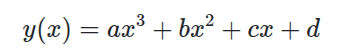

a) Choose some values for the coefficients a, b, c, d, and plot the function.

In [9]:
def poly(x):
    a = 1
    b = 2
    c = 3
    d = 4
    y = a*x**3+b*x**2+c*x+d
    return y

<function matplotlib.pyplot.show(close=None, block=None)>

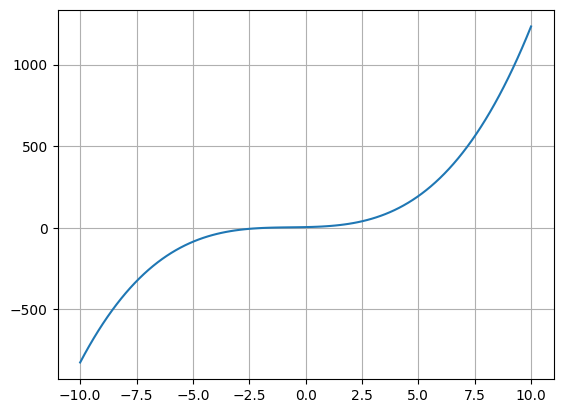

In [10]:
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y_values = poly(x)
plt.plot(x,y_values,label='3rd degree poly')
plt.grid(True)
plt.show

### 5.2 autodifferentiation
b) Use pytorch to obtain the first derivative of y(x) and plot it.

In [ ]:
# one at a time
xs = torch.linspace(-2, 2, 100)
yps = []
for x in xs:
   x.requires_grad_(True)
   y = poly(x)
   y.backward()
   yp = x.grad
   yps.append(yp.detach())

print(yps)

[tensor(7.), tensor(6.6817), tensor(6.3731), tensor(6.0744), tensor(5.7854), tensor(5.5063), tensor(5.2369), tensor(4.9773), tensor(4.7276), tensor(4.4876), tensor(4.2574), tensor(4.0370), tensor(3.8264), tensor(3.6257), tensor(3.4346), tensor(3.2534), tensor(3.0820), tensor(2.9204), tensor(2.7686), tensor(2.6266), tensor(2.4943), tensor(2.3719), tensor(2.2593), tensor(2.1564), tensor(2.0634), tensor(1.9801), tensor(1.9066), tensor(1.8430), tensor(1.7891), tensor(1.7450), tensor(1.7107), tensor(1.6863), tensor(1.6716), tensor(1.6667), tensor(1.6716), tensor(1.6863), tensor(1.7107), tensor(1.7450), tensor(1.7891), tensor(1.8430), tensor(1.9066), tensor(1.9801), tensor(2.0634), tensor(2.1564), tensor(2.2593), tensor(2.3719), tensor(2.4943), tensor(2.6266), tensor(2.7686), tensor(2.9204), tensor(3.0820), tensor(3.2534), tensor(3.4346), tensor(3.6257), tensor(3.8264), tensor(4.0370), tensor(4.2574), tensor(4.4876), tensor(4.7276), tensor(4.9773), tensor(5.2369), tensor(5.5063), tensor(5.78

In [12]:
# all at once
xs = torch.linspace(-2, 2, 100, requires_grad=True)
ys = poly(xs)
yps = torch.autograd.grad(ys, xs, torch.ones_like(xs))[0]

xs = xs.detach().numpy()
yps = yps.detach().numpy()

# print(xs)
# print(ys)
print("derivative of poly(x)")
print(yps)

derivative of poly(x)
[ 7.         6.6816645  6.3731256  6.0743794  5.7854295  5.506275
  5.2369146  4.9773483  4.7275786  4.4876037  4.257423   4.037037
  3.8264465  3.6256504  3.4346495  3.2534432  3.0820327  2.9204164
  2.7685947  2.6265693  2.494337   2.3719008  2.2592592  2.1564126
  2.0633607  1.9801042  1.9066422  1.8429754  1.7891033  1.7450261
  1.7107439  1.6862564  1.6715641  1.6666667  1.6715641  1.6862565
  1.7107438  1.7450261  1.7891032  1.8429751  1.9066422  1.9801041
  2.063361   2.1564126  2.2592592  2.3719008  2.4943373  2.6265688
  2.768595   2.920416   3.0820324  3.2534435  3.4346495  3.6256506
  3.8264463  4.037037   4.257423   4.487603   4.7275786  4.9773493
  5.236915   5.5062747  5.7854295  6.07438    6.373125   6.6816654
  7.0000005  7.32813    7.666054   8.013774   8.371288   8.738598
  9.115704   9.502602   9.899296  10.305784  10.722069  11.148149
 11.584022  12.029691  12.485155  12.950413  13.425467  13.910316
 14.404959  14.909397  15.42363   15.947659  

c) Plot for a few x-values the analytic result that you would get from evaluating the derivative yourself.

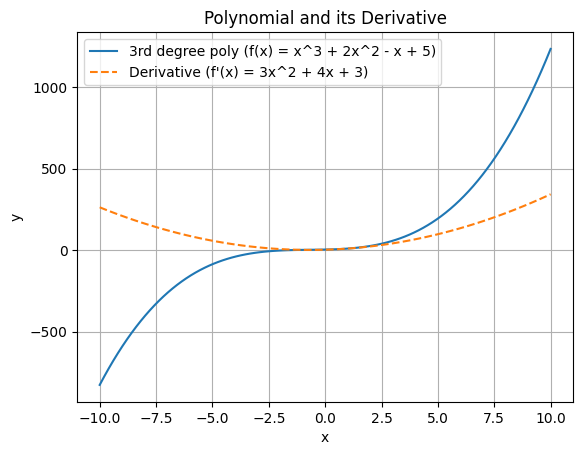

In [13]:
def poly_deriv(x):
    y = 3*x**2 + 4*x + 3
    return y

x = np.linspace(-10,10,100)
y_values = poly(x)
y_deriv_values = poly_deriv(x)

plt.plot(x, y_values, label='3rd degree poly (f(x) = x^3 + 2x^2 - x + 5)')
plt.plot(x, y_deriv_values, label='Derivative (f\'(x) = 3x^2 + 4x + 3)', linestyle='--')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial and its Derivative')

plt.grid(True)
plt.legend()

plt.show()

In [ ]:
# from he tutorial on comp24.sci27.dk
ps = torch.tensor([1.0, 2, 3], requires_grad=True)
qs = ps**2
print(ps)
print(qs)
dq_dp = torch.autograd.grad(qs, ps, torch.ones_like(ps))[0]
print(dq_dp)

tensor([1., 2., 3.], requires_grad=True)
tensor([1., 4., 9.], grad_fn=<PowBackward0>)
tensor([2., 4., 6.])


### 5.3 higher derivatives
d) Repeat b) and c) for the second derivative.

Hint: If you use torch.autograd.grad for the first derivative, you will need to add the argument create_graph=True to be able to make the second derivative.

Second derivative of poly(x):
[-8.         -7.757576   -7.515152   -7.272727   -7.030303   -6.787879
 -6.545454   -6.30303    -6.060606   -5.818182   -5.575757   -5.333334
 -5.090909   -4.848484   -4.606061   -4.363636   -4.121212   -3.878788
 -3.6363635  -3.39394    -3.151515   -2.909091   -2.666667   -2.4242425
 -2.181818   -1.939394   -1.69697    -1.4545455  -1.212121   -0.969697
 -0.727273   -0.4848485  -0.24242401  0.          0.24242449  0.4848485
  0.7272725   0.969697    1.2121212   1.4545455   1.6969697   1.939394
  2.181818    2.4242425   2.6666665   2.909091    3.1515152   3.3939395
  3.6363635   3.8787878   4.121212    4.3636365   4.6060605   4.848485
  5.090909    5.3333335   5.5757575   5.818182    6.060606    6.30303
  6.5454545   6.787879    7.030303    7.2727275   7.5151515   7.7575755
  8.          8.242424    8.484848    8.727273    8.969697    9.212121
  9.454546    9.69697     9.939394   10.181818   10.424242   10.666667
 10.909091   11.151515   11.39394    11.6363

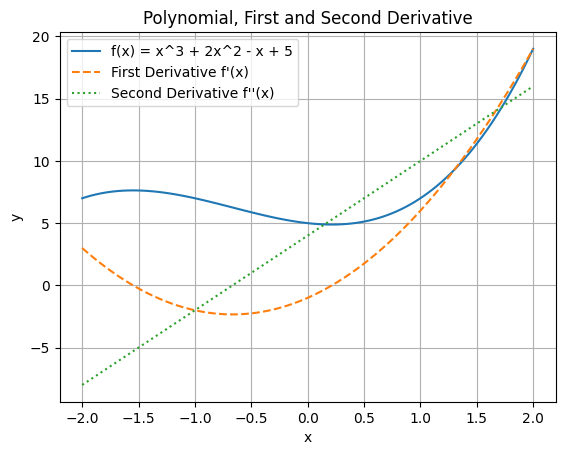

In [ ]:
import torch
import numpy as np

def poly(x):
    return x**3 + 2*x**2 - x + 5

# create tensor
xs = torch.linspace(-2, 2, 100, requires_grad=True)

# calculate polynomial ys = poly(xs)
ys = poly(xs)

# 1st derivative of ys with respect to xs
yps = torch.autograd.grad(ys, xs, torch.ones_like(xs), create_graph=True)[0]

# 2nd derivative of ys with respect to xs
ypps = torch.autograd.grad(yps, xs, torch.ones_like(xs), create_graph=True)[0]

# 3rd derivative of ys wrt xs
yppps = torch.autograd.grad(ypps, xs, torch.ones_like(xs), create_graph=True)[0]

# Detach and convert to numpy for plotting
xs_np = xs.detach().numpy()
ys_np = ys.detach().numpy()
yps_np = yps.detach().numpy()
ypps_np = ypps.detach().numpy()

print("Second derivative of poly(x):")
print(ypps_np)

import matplotlib.pyplot as plt

plt.plot(xs_np, ys_np, label='f(x) = x^3 + 2x^2 - x + 5')
plt.plot(xs_np, yps_np, label='First Derivative f\'(x)', linestyle='--')
plt.plot(xs_np, ypps_np, label='Second Derivative f\'\'(x)', linestyle=':')
plt.grid(True)
plt.legend()
plt.title('Polynomial, First and Second Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## Exercise 42
### 6.1 Autodifferentiation.
This exercise is about performing autodifferentiation utilizing the pytorch package.

### 6.2 Derivative of Gaussian
Plot a Gaussian and its derivative found with autodifferentiation.

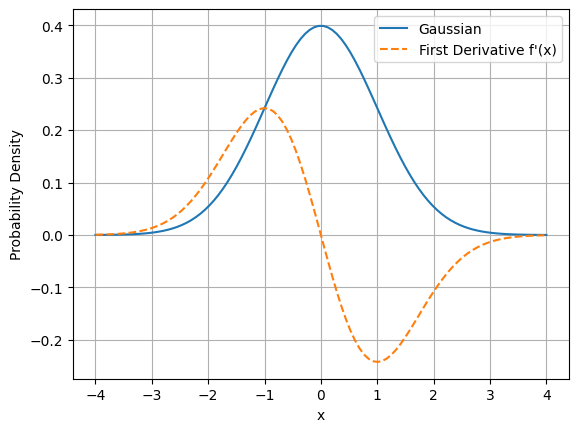

In [14]:
import torch
import matplotlib.pyplot as plt

# parameters for Gaussian
mu = 0
sigma = 1

# define Gaussian using torch
def Gaussian(x):
    y = (1 / (sigma * torch.sqrt(torch.tensor(2 * torch.pi)))) * torch.exp(-0.5 * ((x - mu) / sigma) ** 2)
    return y

# generate x values as a torch tensor
xs = torch.linspace(mu - 4 * sigma, mu + 4 * sigma, 100, requires_grad=True)
ys = Gaussian(xs)

# calculate derivative
yps = torch.autograd.grad(ys, xs, torch.ones_like(xs), create_graph=True)[0]

# convert tensors to numpy for plotting
xs_np = xs.detach().numpy()
ys_np = ys.detach().numpy()
yps_np = yps.detach().numpy()

plt.plot(xs_np, ys_np, label='Gaussian')
plt.plot(xs_np, yps_np, label='First Derivative f\'(x)', linestyle='--')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()


### 6.3 Fermi function derivative
Plot a Fermi function and its derivative found with autodifferentiation.

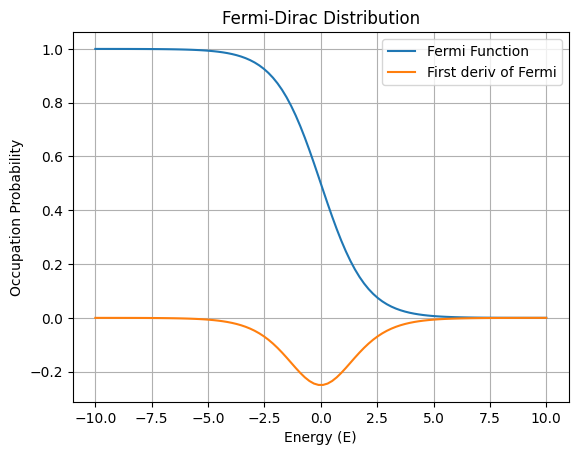

In [16]:
import torch
import matplotlib.pyplot as plt

# constants
Ef = 0  # Fermi energy
kT = 1  # Thermal energy, k * T

# define Fermi function using torch
def fermi_function(E):
    return 1 / (torch.exp((E - Ef) / kT) + 1)

# generate E values as a torch tensor
E_values = torch.linspace(Ef - 10 * kT, Ef + 10 * kT, 100, requires_grad=True)
f_values = fermi_function(E_values)

# calculate derivative
f_prime_values = torch.autograd.grad(f_values, E_values, torch.ones_like(E_values), create_graph=True)[0]

# convert tensors to numpy for plotting
E_np = E_values.detach().numpy()
f_np = f_values.detach().numpy()
fp_np = f_prime_values.detach().numpy()

plt.plot(E_np, f_np, label='Fermi Function')
plt.plot(E_np, fp_np, label='First deriv of Fermi')
plt.xlabel('Energy (E)')
plt.ylabel('Occupation Probability')
plt.title('Fermi-Dirac Distribution')
plt.legend()
plt.grid()
plt.show()


### 6.4 LJ potential derivative
a) Complete this class implementing the Lennard-Jones-Gauss potential for distances r:

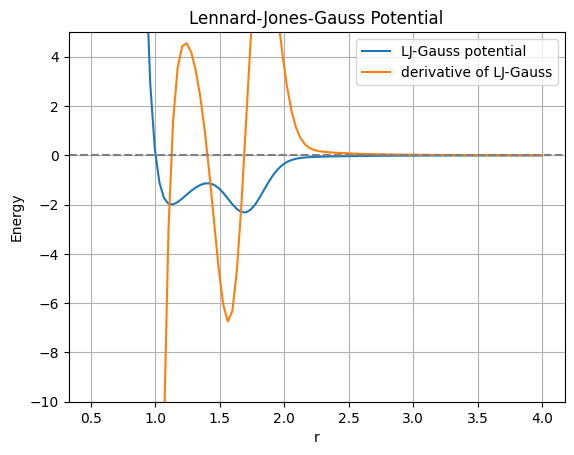

In [34]:
import torch
import matplotlib.pyplot as plt

class LennardJonesGauss:
    def __init__(self, eps=1, sigma=1, r0=1.7, A=1, b=0.1):
        self.eps = eps
        self.sigma = sigma
        self.r0 = r0
        self.A = A  # Height of the Gaussian term
        self.b = b  # Width of the Gaussian term
        
    def V(self, r):
        r = torch.maximum(r, torch.tensor(1e-6))  #prevent division by zero
        lj_potential = 4 * self.eps * ((self.sigma / r)**12 - (self.sigma / r)**6)
        gaussian_term = self.A * torch.exp(-((r - self.r0) / self.b)**2)
        return lj_potential + gaussian_term

calc = LennardJonesGauss(eps=2, sigma=1, A=-2, r0=1.7, b=0.2)

xs = torch.linspace(0.5, 4, 100, requires_grad=True) 
ys = calc.V(xs)
yps = torch.autograd.grad(ys, xs, torch.ones_like(xs), create_graph=True)[0]

plt.plot(xs.detach().numpy(), ys.detach().numpy(), label='LJ-Gauss potential')
plt.plot(xs.detach().numpy(), yps.detach().numpy(), label='derivative of LJ-Gauss')
plt.xlabel('r')
plt.ylabel('Energy')
plt.title('Lennard-Jones-Gauss Potential')
plt.legend()
plt.grid() 
plt.ylim(-10, 5) 
plt.axhline(0, color='gray', linestyle='--')
plt.show()


## Exercise 43 
### 7.1 the real gradient
In the previous exercises you used pytorch's .grad or autograd.grad to find the derivative. In that context the term "gradient" is actually a little misleading.

In this exercise you will be working with the "real" gradient, which is what you get when you have a scalar function of several parameters:

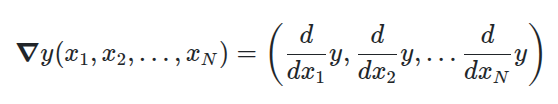

### 7.2 The scalar function
Make a contour plot for the function:

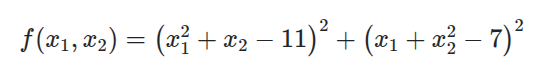

In [35]:
def f(x1, x2):
    return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import torch

class ContourPlotter:
    def __init__(self, func, r_min=-5.0, r_max=5.0, step=0.1):
        self.func = func
        self.r_min = r_min
        self.r_max = r_max
        self.step = step
        self.fig, self.ax = plt.subplots()

    def plot_contour(self):
        vals = np.arange(self.r_min, self.r_max, self.step)
        x1d, x2d = np.meshgrid(vals, vals)
        yd = self.func(x1d, x2d)

        levels = np.geomspace(1, 300, 8)
        self.ax.contour(x1d, x2d, yd, levels=levels)
        color_map = self.ax.contourf(x1d, x2d, yd, levels=levels, alpha=0.5)
        self.fig.colorbar(color_map, ax=self.ax)
        self.ax.set(xlabel='$x_1$', ylabel='$x_2$')
        
    def plot_gradients(self, points):
        for P0 in points:
            P0_tensor = torch.tensor(P0, requires_grad=True)
            y = self.func(*P0_tensor)
            y.backward()
            grad_of_y = P0_tensor.grad.detach()
            P0_tensor = P0_tensor.detach()

            # Normalize the gradient for visualization
            v = grad_of_y / np.linalg.norm(grad_of_y)

            # Scatter the point and draw the gradient arrow
            self.ax.scatter(*P0_tensor, s=200, c='k')  # Scatter the point
            self.ax.arrow(*P0_tensor, *v, width=0.2, head_width=0.3, color='red')  # Draw the arrow for the gradient

    def show(self):
        plt.show()  # Display the plot with gradients


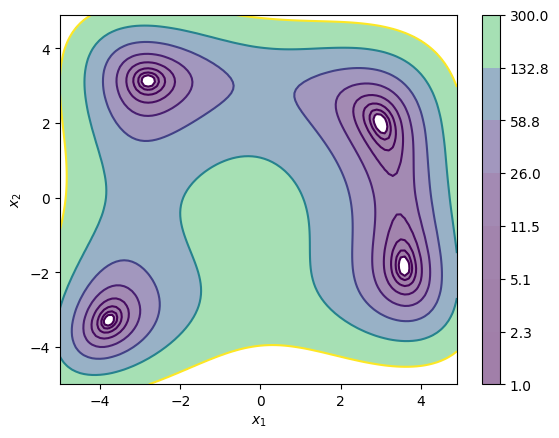

In [37]:
plotter = ContourPlotter(func=f)
plotter.plot_contour()
plotter.show()

### 7.3 The gradients
Use pytorch to evaluate the gradients and plot them.

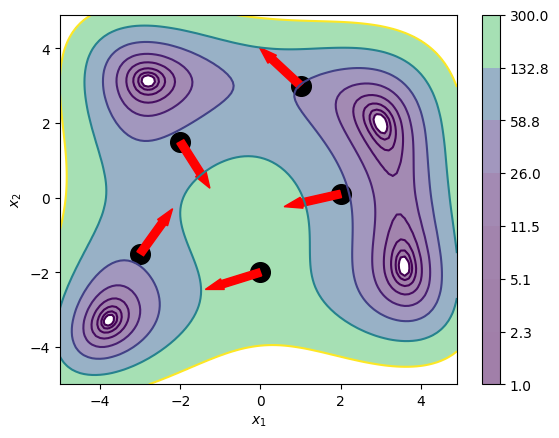

In [38]:
plotter = ContourPlotter(func=f)

plotter.plot_contour()

# points for gradient vis
gradient_points = [[-2, 1.5], [2, 0.1], [-3, -1.5], [0.0,-2.0], [1.0, 3.0]]

plotter.plot_gradients(points=gradient_points)
plotter.show()


## Exercise 44
### 8.1 Using a pytorch model
This exercise is about praticing using the pytorch.nn.model. Such models are very pratical whenever you perform optimizations. In this exercise, only a few parameters are optimized, but in later exercises, the many parameters of neural networks will be optimized in the same way.
### 8.2 A parabola
Consider the parabola 

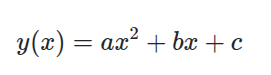

a) Setup a pytorch model, where a, b, c are parameters. Use some arbitrary values for the parameters to begin with.

In [ ]:
a = 1.5
b = 0.5
c = 2
def parab(x):
    return a*x**2+b*x+c

b) Plot y(x). If you feel like recapping the topic of the previous exercises, use autodifferentiation and plot y'(x).

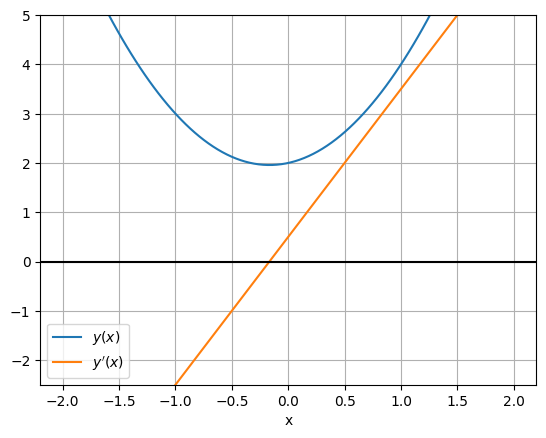

In [ ]:
# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-2, 2, 100, requires_grad=True)
ys = parab(xs)
yps = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs))[0]

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy
    ax.plot(xs, yps, label="$y'(x)$")  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.set_ylim([-2.5, 5])  # Set the y-axis limits
ax.legend()

plt.show()  # Display the plot

### 8.3 Fitting
c) consider this data 

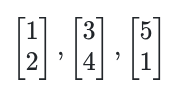

In [43]:
xtest_tensor = torch.tensor([1,3.,5])
ytest_tensor = torch.tensor([2,4.,1])

Now use your pytorch model to determine a, b, c, so as to make the curve (x,(y(x)) fit the data best possibly.

Hint 1: Notice the similarity between obtaining the gradient for plotting it (as in the previous exercises) and obtaining the gradient for optimizing a loss function with respect to some parameters.

Hint 2: The torch.optim.Adam optimizer might work well with a 0.01 learning rate. The torch.optim.SGD might require a smaller learning rate.

Hint 3a: You can write the mean-square-error loss function like this:

In [40]:
# outside training loop:
loss_func = torch.nn.MSELoss()

# inside training loop:
loss = loss_func(y_prediction, y_train)

NameError: name 'y_prediction' is not defined

which will be faster for applications with much data.

In [ ]:
#define the model
class ParabolaModel(torch.nn.Module):
    def __init__(self, a=1, b=0, c=0):
        super().__init__()
        self.a = torch.nn.Parameter(torch.tensor(float(a)))
        self.b = torch.nn.Parameter(torch.tensor(float(b)))
        self.c = torch.nn.Parameter(torch.tensor(float(c)))

    def forward(self, x):
        return self.a * x**2 + self.b * x + self.c
    
a = 1
b = 2
c = 3


# instantiate the model
model = ParabolaModel(a=a,b=b,c=c)
model(1)

# print the parameters
for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())



Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(2., requires_grad=True)
Parameter containing:
tensor(3., requires_grad=True)
a = 1.0
b = 2.0
c = 3.0


Training the parabola model:

In [ ]:
steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

loss_fn = torch.nn.MSELoss() 

for step in range(steps):
    y_pred = model(xtest_tensor)                    # STEP 1: Calculate predictions (Forward Propagation)
    loss = torch.mean((y_pred - ytest_tensor) ** 2) # STEP 2: Calculate loss

    optimizer.zero_grad()   # reset gradients       
    loss.backward()                                 # STEP 3: Backpropagation (calc gradients)
    optimizer.step()                                # STEP 4: Update model parameters

    if step % 500 == 0:                             # Optinal step 5: Logging progress
        print(f'Step {step}, Loss: {loss.item()}')

Step 0, Loss: 527.0
Step 500, Loss: 0.7490184903144836
Step 1000, Loss: 0.5840409398078918
Step 1500, Loss: 0.524422287940979
Step 2000, Loss: 0.4825302064418793
Step 2500, Loss: 0.44568920135498047
Step 3000, Loss: 0.4119041860103607
Step 3500, Loss: 0.38071581721305847
Step 4000, Loss: 0.35189369320869446
Step 4500, Loss: 0.32525405287742615
Step 5000, Loss: 0.30063143372535706
Step 5500, Loss: 0.2778727114200592
Step 6000, Loss: 0.25683701038360596
Step 6500, Loss: 0.23739349842071533
Step 7000, Loss: 0.2194223403930664
Step 7500, Loss: 0.2028115838766098
Step 8000, Loss: 0.18745805323123932
Step 8500, Loss: 0.1732671856880188
Step 9000, Loss: 0.16015052795410156
Step 9500, Loss: 0.14802706241607666


Accessing the trained model parameters after training:

In [48]:
for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

a = -0.4443545937538147
b = 2.3349759578704834
c = 0.569392204284668


model.named_parameters(): Returns an iterator over model parameters, yielding both the name and the parameter tensor.

parameter.data.item(): Extracts the value from the tensor as a plain Python number.

Prints: The name of the parameter (like a, b, c) and its optimized value after training.

Plot of parabola with found parameters (generated by Copilot):

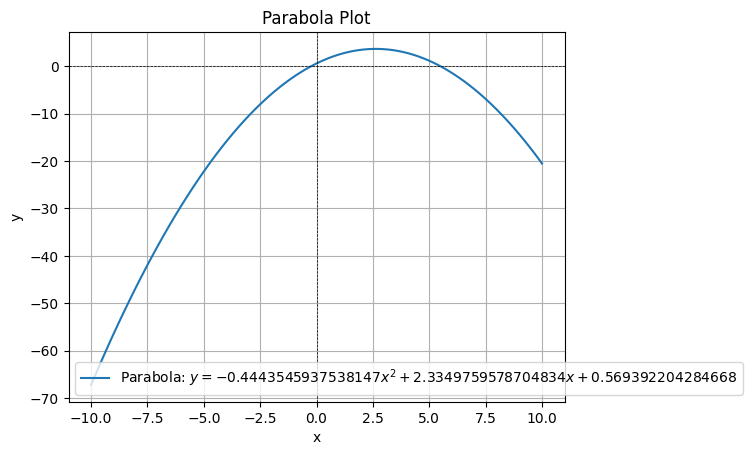

In [50]:
import numpy as np

import matplotlib.pyplot as plt

# Define the parabola function
def parabola(x, a, b, c):
    return a * x**2 + b * x + c

# Parameters from above
a = -0.4443545937538147
b = 2.3349759578704834
c = 0.569392204284668

# Generate x values
x = np.linspace(-10, 10, 100)

# Calculate y values
y = parabola(x, a, b, c)

# Plot the parabola
plt.plot(x, y, label=f'Parabola: $y = {a}x^2 + {b}x + {c}$')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Parabola Plot')
plt.legend()
plt.grid(True)
plt.show()

### 8.4 Gaussian
d) Fit instead a Gaussian,

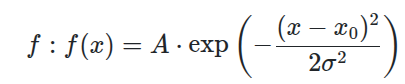

to the data using the same technique as in c).

In [61]:
def Gaussian(x, A=1, sigma=1,x0=0):
    return A * torch.exp(-(x-x0)**2/(2*sigma**2))

The Gaussian Model:

In [52]:
# define the model
class GaussianModel(torch.nn.Module):
    def __init__(self, A=1, x0=0, sigma=1):
        super().__init__()
        self.A = torch.nn.Parameter(torch.tensor(float(A)))
        self.x0 = torch.nn.Parameter(torch.tensor(float(x0)))
        self.sigma = torch.nn.Parameter(torch.tensor(float(sigma)))

    def forward(self, x):
        return self.A * torch.exp(-(x-self.x0)**2/(2*sigma**2))

# instantiate the model
A = 1
x0 = 0
sigma = 1

model = GaussianModel(A=A,x0=x0,sigma=sigma)
model(1)

# inspect the learnable parameters
for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
Parameter containing:
tensor(1., requires_grad=True)
A = 1.0
x0 = 0.0
sigma = 1.0


In [53]:
# still the same points as in parabola exercise above
xtest_tensor = torch.tensor([1,3.,5])
ytest_tensor = torch.tensor([2,4.,1])

In [54]:
steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(xtest_tensor)
    loss = torch.mean((y_pred - ytest_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Step 0, Loss: 6.284332752227783
Step 500, Loss: 5.86681604385376
Step 1000, Loss: 5.443511486053467
Step 1500, Loss: 4.613120079040527
Step 2000, Loss: 2.2016050815582275
Step 2500, Loss: 1.1856884956359863
Step 3000, Loss: 0.8015625476837158
Step 3500, Loss: 0.5857678055763245
Step 4000, Loss: 0.4532029330730438
Step 4500, Loss: 0.3713184893131256
Step 5000, Loss: 0.32083335518836975
Step 5500, Loss: 0.28973937034606934
Step 6000, Loss: 0.2706001102924347
Step 6500, Loss: 0.25882551074028015
Step 7000, Loss: 0.25158390402793884
Step 7500, Loss: 0.24713124334812164
Step 8000, Loss: 0.2443939447402954
Step 8500, Loss: 0.24271135032176971
Step 9000, Loss: 0.24167710542678833
Step 9500, Loss: 0.24104152619838715
A = 4.9006171226501465
x0 = 2.3766415119171143
sigma = 1.0


Plot the gaussian with the trained parameters:

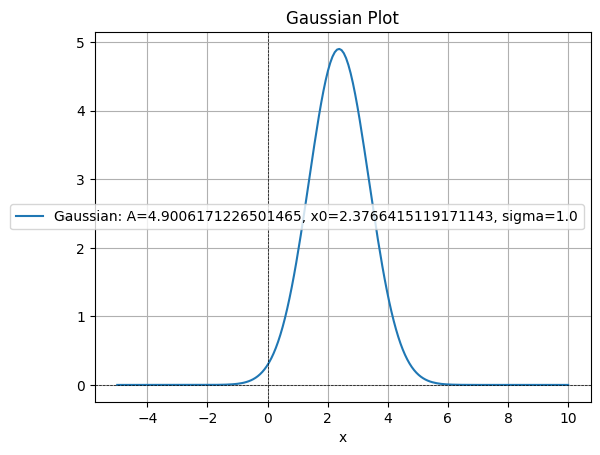

In [68]:
# Use the existing Gaussian function
# Parameters
A = 4.9006171226501465
x0 = 2.3766415119171143
sigma = 1.0
# Generate x values
x = np.linspace(-5, 10, 200)

# Convert x to a tensor
x_tensor = torch.tensor(x, dtype=torch.float32)

# Calculate y values using the Gaussian function
y = Gaussian(x_tensor, A, sigma, x0).detach().numpy()

# Plot the Gaussian
plt.plot(x, y, label=f'Gaussian: A={A}, x0={x0}, sigma={sigma}')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gaussian Plot')
plt.legend()
plt.grid(True)
plt.show()


### 8.5 Circle
e) Now fit a circle through the three points.

Hint: The loss-function is the hard part. Here is what it should contain:

Evaluate distances of each point to the current center.

Evaluate the mean of the squared deviations of those distances to the current radius.

In [69]:
class CircleModel(torch.nn.Module):
    def __init__(self, x1=3, y1=2, r=2):  # Start closer to the target values
        super().__init__()
        self.x1 = torch.nn.Parameter(torch.tensor(float(x1)))
        self.y1 = torch.nn.Parameter(torch.tensor(float(y1)))
        self.r = torch.nn.Parameter(torch.tensor(float(r)))

    def forward(self, x, y):
        # Compute the Euclidean distance from each point (x, y) to the center (x1, y1)
        distance = torch.sqrt((x - self.x1)**2 + (y - self.y1)**2)
        return distance

x1=0
y1=0
r=1

# Initialize the model with parameters
model = CircleModel(x1=x1, y1=y1, r=r)

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [70]:
steps = 10000
for step in range(steps):
    distances = model(xtest_tensor, ytest_tensor)
    # Loss as the mean squared deviation of distances from the radius
    loss = torch.mean((distances - model.r) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

# Final parameters
for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Step 0, Loss: 11.443275451660156
Step 500, Loss: 0.9162206053733826
Step 1000, Loss: 0.17983998358249664
Step 1500, Loss: 0.024594850838184357
Step 2000, Loss: 0.0003348416357766837
Step 2500, Loss: 6.297383947639901e-07
Step 3000, Loss: 1.7071973001936414e-10
Step 3500, Loss: 7.491962605854496e-11
Step 4000, Loss: 4.375048587301755e-11
Step 4500, Loss: 2.5787963778278744e-11
Step 5000, Loss: 1.5631940186722204e-11
Step 5500, Loss: 9.644433689171006e-12
Step 6000, Loss: 5.722237354094384e-12
Step 6500, Loss: 2.8232232090336096e-12
Step 7000, Loss: 1.572667885675616e-12
Step 7500, Loss: 9.663381206337363e-13
Step 8000, Loss: 4.926429815303723e-13
Step 8500, Loss: 3.031649096259942e-13
Step 9000, Loss: 7.579122740649855e-14
Step 9500, Loss: 7.579122740649855e-14
x1 = 3.0999996662139893
y1 = 1.8999998569488525
r = 2.10237979888916


Illustrating with plot:

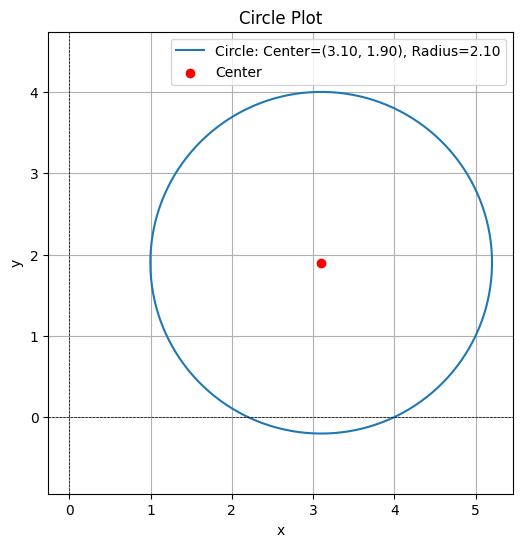

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Circle parameters
x1 = 3.0999996662139893
y1 = 1.8999998569488525
r = 2.10237979888916

# Generate points on the circle
theta = np.linspace(0, 2 * np.pi, 300)
x = x1 + r * np.cos(theta)
y = y1 + r * np.sin(theta)

# Plot the circle
plt.figure(figsize=(6, 6))
plt.plot(x, y, label=f'Circle: Center=({x1:.2f}, {y1:.2f}), Radius={r:.2f}')
plt.scatter([x1], [y1], color='red', label='Center', zorder=5)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Circle Plot')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


## Exercise 45
### 9.1 Gaussian fit

a) Make a pytorch model for a Gaussian:

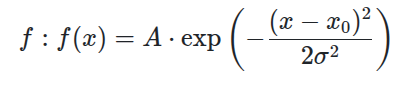

b) assume $x_0 = -1$ and $\sigma=0.3$. 

In [92]:
class GaussianModel(torch.nn.Module):
    def __init__(self, A=1):
        super().__init__()
        self.A = torch.nn.Parameter(torch.tensor(float(A)))

    def forward(self, x, x0, sigma):
        self.x0 = x0
        self.sigma = sigma
        return self.A * np.exp(-(x-x0)**2/(2*sigma**2))

A = 1
x0 = -1
sigma = 0.3

model = GaussianModel(A=A)
model(1,x0,sigma)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Parameter containing:
tensor(1., requires_grad=True)
A = 1.0


Fit the amplitude, A, to the provided data.

In [100]:
data = np.array([[-1.493,  0.048],
       [-1.25 ,  0.459],
       [-0.842,  0.731],
       [-0.676,  0.269],
       [-0.332,  0.004],
       [ 0.544,  0.   ],
       [ 1.363,  0.079],
       [ 1.621,  0.083],
       [ 1.853,  0.021],
       [ 2.892,  0.   ]])

#rewrite to have same form as in ex 44
xtest_tensor = torch.tensor([row[0] for row in data])
ytest_tensor = torch.tensor([row[1] for row in data])

x0 = -1  
sigma = 0.3

steps = 10000

optimizer = torch.optim.SGD([model.A], lr=0.001)

loss_fn = torch.nn.MSELoss() #added at next slide

for step in range(steps):
    y_pred = model(xtest_tensor, x0=x0, sigma=sigma)  # Forward pass
    loss = torch.mean((y_pred - ytest_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

/tmp/ipykernel_169339/2691527747.py:9: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return self.A * np.exp(-(x-x0)**2/(2*sigma**2))


Step 0, Loss: 0.0632484844489754
Step 500, Loss: 0.04734917874091545
Step 1000, Loss: 0.03590294206843563
Step 1500, Loss: 0.027662557365389584
Step 2000, Loss: 0.02173014107404516
Step 2500, Loss: 0.017459188173978863
Step 3000, Loss: 0.014384516054551086
Step 3500, Loss: 0.012171001189502807
Step 4000, Loss: 0.010577440604701073
Step 4500, Loss: 0.009430211873066124
Step 5000, Loss: 0.008604291810074879
Step 5500, Loss: 0.00800969766298554
Step 6000, Loss: 0.007581632998014715
Step 6500, Loss: 0.007273460144337093
Step 7000, Loss: 0.007051596601275988
Step 7500, Loss: 0.006891878548223903
Step 8000, Loss: 0.0067768931202014816
Step 8500, Loss: 0.006694110711766624
Step 9000, Loss: 0.006634517337514692
Step 9500, Loss: 0.006591614842102471
A = 0.6619654297828674


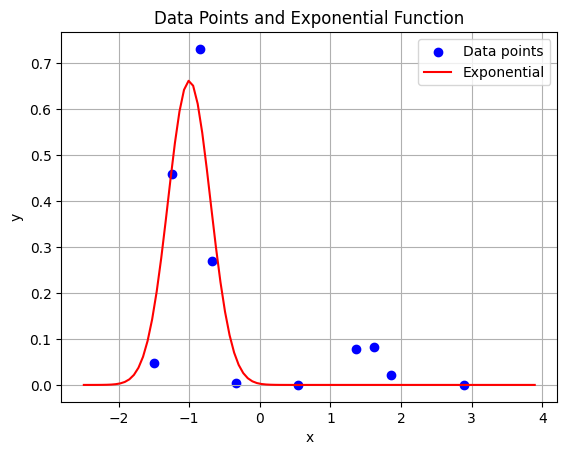

In [101]:
# Define the exponential function
def exponential_func(x):
    A = model.A.detach().item() # this is the value from training (remember to run training before this)
    x0 = -1
    sigma = 0.3
    return A * torch.exp(-(x-x0)**2/(2*sigma**2))

# Plot data points
plt.scatter(xtest_tensor, ytest_tensor, color='blue', label='Data points')

# Plot the exponential function
x_vals = torch.linspace(min(xtest_tensor).item() - 1, max(xtest_tensor).item() + 1, 100)
A, b = 1, 0.5  
y_vals = exponential_func(x_vals)
plt.plot(x_vals, y_vals, color='red', label=f'Exponential')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data Points and Exponential Function')
plt.grid(True)
plt.show()

c) Assume x0 = 1.5, sigma=0.3. Fit again the amplitude, A.

In [95]:
data = np.array([[-1.493,  0.048],
       [-1.25 ,  0.459],
       [-0.842,  0.731],
       [-0.676,  0.269],
       [-0.332,  0.004],
       [ 0.544,  0.   ],
       [ 1.363,  0.079],
       [ 1.621,  0.083],
       [ 1.853,  0.021],
       [ 2.892,  0.   ]])

#rewrite to have same form as in ex 44
xtest_tensor = torch.tensor([row[0] for row in data])
ytest_tensor = torch.tensor([row[1] for row in data])

x0 = 1.5  
sigma = 0.3

steps = 10000

optimizer = torch.optim.SGD([model.A], lr=0.001)

loss_fn = torch.nn.MSELoss() #added at next slide

for step in range(steps):
    y_pred = model(xtest_tensor,x0,sigma)  # Forward pass
    loss = torch.mean((y_pred - ytest_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

/tmp/ipykernel_169339/2691527747.py:9: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return self.A * np.exp(-(x-x0)**2/(2*sigma**2))


Step 0, Loss: 0.15387893631667823
Step 500, Loss: 0.13103931563319407
Step 1000, Loss: 0.11545905360902246
Step 1500, Loss: 0.10483087211586524
Step 2000, Loss: 0.09758076341360455
Step 2500, Loss: 0.09263504852071147
Step 3000, Loss: 0.08926130758568204
Step 3500, Loss: 0.08695986398591803
Step 4000, Loss: 0.08538991625087129
Step 4500, Loss: 0.08431896685257319
Step 5000, Loss: 0.08358839448880909
Step 5500, Loss: 0.08309004127840187
Step 6000, Loss: 0.08275008743102531
Step 6500, Loss: 0.08251818664914126
Step 7000, Loss: 0.08235999241538344
Step 7500, Loss: 0.08225207863752447
Step 8000, Loss: 0.08217846340865145
Step 8500, Loss: 0.0821282473060615
Step 9000, Loss: 0.08209399135332839
Step 9500, Loss: 0.08207062367238607
A = 0.09611355513334274


Plot 

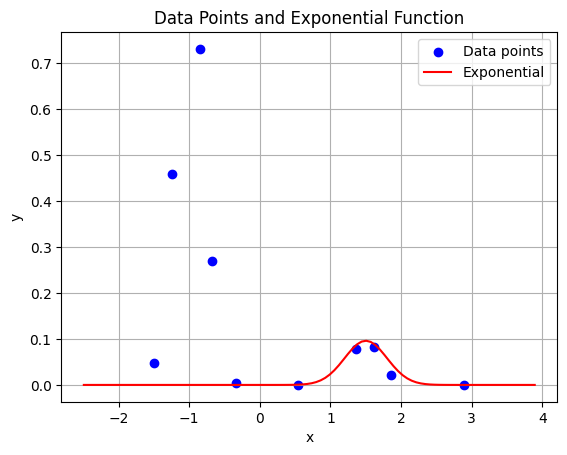

In [99]:
# Define the exponential function
def exponential_func(x):
    A = model.A.detach().item()
    x0 = 1.5
    sigma = 0.3
    return A * torch.exp(-(x-x0)**2/(2*sigma**2))

# Plot data points
plt.scatter(xtest_tensor, ytest_tensor, color='blue', label='Data points')

# Plot the exponential function
x_vals = torch.linspace(min(xtest_tensor).item() - 1, max(xtest_tensor).item() + 1, 100)
A, b = 1, 0.5  
y_vals = exponential_func(x_vals)
plt.plot(x_vals, y_vals, color='red', label=f'Exponential')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data Points and Exponential Function')
plt.grid(True)
plt.show()

### 9.2 Full fit
d) Now fit all three parameters, A, $x_0$, $\sigma$. Play around wuth initializing the model with different $(A, x_0,\sigma)$-values and see what kind of fits you get.

In [102]:
# Gaussian model

class GaussianModel(torch.nn.Module):
    def __init__(self, A=1, x0=0, sigma=1):
        super().__init__()
        self.A = torch.nn.Parameter(torch.tensor(float(A)))
        self.x0 = torch.nn.Parameter(torch.tensor(float(x0)))
        self.sigma = torch.nn.Parameter(torch.tensor(float(sigma)))

    def forward(self, x):
        return self.A * torch.exp(-(x-self.x0)**2/(2*sigma**2))

A = 0.1
x0 = 1.2
sigma = 0.5

model = GaussianModel(A=A,x0=x0,sigma=sigma)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Parameter containing:
tensor(0.1000, requires_grad=True)
Parameter containing:
tensor(1.2000, requires_grad=True)
Parameter containing:
tensor(0.5000, requires_grad=True)
A = 0.10000000149011612
x0 = 1.2000000476837158
sigma = 0.5


In [103]:
data = np.array([[-1.493,  0.048],
       [-1.25 ,  0.459],
       [-0.842,  0.731],
       [-0.676,  0.269],
       [-0.332,  0.004],
       [ 0.544,  0.   ],
       [ 1.363,  0.079],
       [ 1.621,  0.083],
       [ 1.853,  0.021],
       [ 2.892,  0.   ]])

#rewrite to have same form as in ex 44
xtest_tensor = torch.tensor([row[0] for row in data])
ytest_tensor = torch.tensor([row[1] for row in data])

steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(xtest_tensor)
    loss = torch.mean((y_pred - ytest_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Step 0, Loss: 0.08223051359188323
Step 500, Loss: 0.08221236818409165
Step 1000, Loss: 0.08219948332959652
Step 1500, Loss: 0.08219032171653791
Step 2000, Loss: 0.0821837491725416
Step 2500, Loss: 0.08217902171544605
Step 3000, Loss: 0.08217559925515358
Step 3500, Loss: 0.0821730976572152
Step 4000, Loss: 0.08217124593148012
Step 4500, Loss: 0.08216985299902232
Step 5000, Loss: 0.08216878400651481
Step 5500, Loss: 0.08216794380895984
Step 6000, Loss: 0.0821672321602186
Step 6500, Loss: 0.08216662113016308
Step 7000, Loss: 0.08216609079960599
Step 7500, Loss: 0.08216561783687602
Step 8000, Loss: 0.0821651857628177
Step 8500, Loss: 0.08216478296110956
Step 9000, Loss: 0.08216440118566185
Step 9500, Loss: 0.0821640346391771
A = 0.0817173421382904
x0 = 1.2074532508850098
sigma = 0.5


0.0817173421382904 1.2074532508850098 0.5


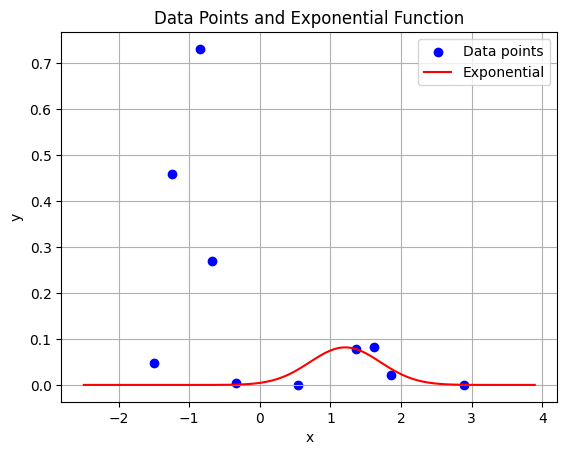

In [ ]:
# Define the exponential function with parameters as arguments
def exponential_func(x, A, x0, sigma):
    return A * torch.exp(-(x - x0)**2 / (2 * sigma**2))

# Assign values to A, x0, sigma from the model
for name, parameter in model.named_parameters():
    globals()[name] = parameter.data.item()

print(A, x0, sigma)  # Check that parameters are assigned correctly

plt.scatter(xtest_tensor, ytest_tensor, color='blue', label='Data points')

x_vals = torch.linspace(min(xtest_tensor).item() - 1, max(xtest_tensor).item() + 1, 100)
y_vals = exponential_func(x_vals, A, x0, sigma)
plt.plot(x_vals, y_vals, color='red', label=f'Exponential')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data Points and Exponential Function')
plt.grid(True)
plt.show()


## Exercise 46
### 10.1 Spring models
In this exercise you will work with beads connected by springs. In the first exercise, you will optimize the position of one bead to minimize the energy of two springs. This can be programmed with just two "optimizable" parameters, x and y, which can be held in two separate one-dimensional torch-tensors. In the next exercises you will optimize the positions of many beads, and some higher-dimensional tensor(s) with the positions will make the code look clearer.

### 10.2 A bead between two springs
a) Optimize the position of a central bead held by two springs attached to some fixed beads.

Steps:

- make a torch.nn.module-model for the optimizable coords
- energy func as forword func for model
- choose optimizer that is aware of optimizable coords
- optimize the loss func (i.e. the energy func) 
- energy func obtained by calling the model w/o params

In [ ]:
# model where the optimizable coordinates are held
class TwoSpringSys(torch.nn.Module):
    def __init__(self,P0,P2,equilibrium_len=2.0,spring_const=1.0):
        super().__init__()
        self.P0 = torch.tensor(P0)
        self.P1 = torch.nn.Parameter(torch.rand(1,2)*5)
        self.P2 = torch.tensor(P2)
        self.equilibrium_len = equilibrium_len
        self.spring_const = spring_const
        
    # an energy function as the forward-function
    def forward(self):
        d1 = torch.norm(self.P1 - self.P0)
        d2 = torch.norm(self.P2 - self.P1)

        energy = 0.5*self.spring_const*(d1-self.equilibrium_len)**2 \
                + 0.5*self.spring_const *(d2-self.equilibrium_len)**2
        
        return energy
    
    def draw(self,ax):
        pos = torch.vstack((self.P0,self.P1.detach(),self.P2))
        ax.scatter(pos[:,0],pos[:,1],color='C0',s=400)
        for i in range(3):
            ax.text(pos[i,0]*1,
                    pos[i,1]*1,
                    f'{i}',color='w',ha='center',va='center')
            
        for i in range(2):
            j = i + 1
            ax.plot([pos[i,0],pos[j,0]],
                    [pos[i,1],pos[j,1]],
                color='C0')
            
        ax.set_aspect('equal','box')
        ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.yaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.grid('on')
        ax.set(xlim=[-0.5,7],ylim=[-3,5],xlabel='x',ylabel='y')

learning_rate = 0.01
steos = 10000
P0 = [0,0]
P2 = [4,0]

model = TwoSpringSys(P0,P2)
# choose an optimizer that is aware of the optimizable coordinates:
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

for step in range(steps):
    optimizer.zero_grad()
    energy = model()
    energy.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Energy: {energy.item()}')

print("Optimized position of P1:", model.P1.data.numpy())

Step 0, Energy: 0.191578671336174
Step 500, Energy: 0.005239531863480806
Step 1000, Energy: 0.0018223782535642385
Step 1500, Energy: 0.0009089611703529954
Step 2000, Energy: 0.0005413880571722984
Step 2500, Energy: 0.0003583523503039032
Step 3000, Energy: 0.0002543709706515074
Step 3500, Energy: 0.00018976681167259812
Step 4000, Energy: 0.00014692929107695818
Step 4500, Energy: 0.00011709114187397063
Step 5000, Energy: 9.547923400532454e-05
Step 5500, Energy: 7.933395681902766e-05
Step 6000, Energy: 6.695569027215242e-05
Step 6500, Energy: 5.726203016820364e-05
Step 7000, Energy: 4.9525024223839864e-05
Step 7500, Energy: 4.325556801632047e-05
Step 8000, Energy: 3.810317866737023e-05
Step 8500, Energy: 3.381873102625832e-05
Step 9000, Energy: 3.0216782761272043e-05
Step 9500, Energy: 2.7160696845385246e-05
Optimized position of P1: [[1.999997   0.14086299]]


Obtain and use for plotting the optimized positions:

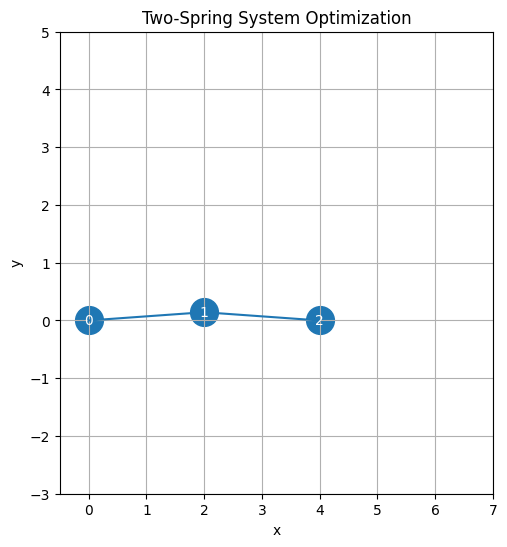

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
model.draw(ax)
plt.title('Two-Spring System Optimization')
plt.show()

### 10.3 A string of beads
b) Now generalize you solution to a) so as to handle a whole string of beads connected by springs.

Step 0, Energy: 4.205378532409668
Step 500, Energy: 0.0005753088044002652
Step 1000, Energy: 1.649103751333314e-07
Step 1500, Energy: 1.0173550890613114e-10
Step 2000, Energy: 6.423306331271306e-11
Step 2500, Energy: 6.423306331271306e-11
Step 3000, Energy: 6.423306331271306e-11
Step 3500, Energy: 6.423306331271306e-11
Optimized positions of beads:
Bead 1: [0.50649804 1.9348096 ]
Bead 2: [1.9194027 0.5192901]
Bead 3: [3.3685284 1.8977032]


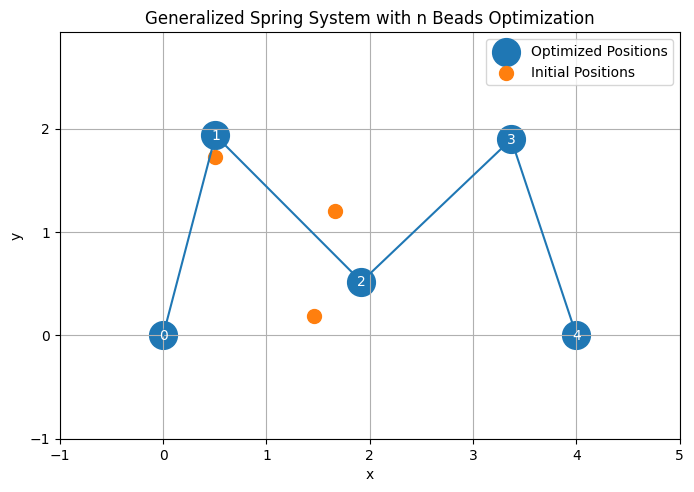

In [108]:
import torch
import matplotlib.pyplot as plt

# Define the generalized spring system model
class SpringSystem(torch.nn.Module):
    def __init__(self, P0, P2, n, equilibrium_len=2.0, spring_const=1.0):
        super().__init__()
        self.P0 = torch.tensor(P0, dtype=torch.float32)
        self.P2 = torch.tensor(P2, dtype=torch.float32)
        
        # Create n-2 optimizable beads initialized randomly
        self.P = torch.nn.Parameter(torch.rand(n - 2, 2) * 5)  # Random initial positions
        
        self.equilibrium_len = equilibrium_len
        self.spring_const = spring_const
    
    def forward(self):
        energy = 0.0
        
        # Calculate energy between fixed points and beads
        d1 = torch.norm(self.P[0] - self.P0)  # First bead to P0
        energy += 0.5 * self.spring_const * (d1 - self.equilibrium_len) ** 2
        
        for i in range(1, len(self.P)):
            d2 = torch.norm(self.P[i] - self.P[i-1])  # Spring between adjacent beads
            energy += 0.5 * self.spring_const * (d2 - self.equilibrium_len) ** 2
            
        # Energy between the last bead and the fixed point P2
        d3 = torch.norm(self.P[-1] - self.P2)
        energy += 0.5 * self.spring_const * (d3 - self.equilibrium_len) ** 2
        
        return energy
    
    def draw(self, ax, show_initial=False):
        pos = torch.vstack((self.P0, self.P.detach(), self.P2))  # Use .detach() for P

        ax.scatter(pos[:, 0].numpy(), pos[:, 1].numpy(), color='C0', s=400, label='Optimized Positions')  # Convert to NumPy
        for i in range(len(pos)):
            ax.text(pos[i, 0].item(), pos[i, 1].item(), f'{i}', color='w', ha='center', va='center')

        ax.plot([self.P0[0].item(), self.P[0, 0].item()], [self.P0[1].item(), self.P[0, 1].item()], color='C0')
        for i in range(1, len(self.P)):
            ax.plot([self.P[i-1, 0].item(), self.P[i, 0].item()], [self.P[i-1, 1].item(), self.P[i, 1].item()], color='C0')
        ax.plot([self.P[-1, 0].item(), self.P2[0].item()], [self.P[-1, 1].item(), self.P2[1].item()], color='C0')

        if show_initial:
            initial_positions = torch.rand(len(self.P), 2) * 5  # Initial random positions
            ax.scatter(initial_positions.numpy()[:, 0], initial_positions.numpy()[:, 1], color='C1', s=100, label='Initial Positions')
        
        # Assume `pos` is the tensor containing all bead positions (including P0, P, and P2)
        all_positions = torch.vstack((model.P0, model.P.detach(), model.P2))  # Combine all positions

        # Calculate min and max values for x and y axes based on bead positions
        x_min, x_max = all_positions[:, 0].min().item() - 1, all_positions[:, 0].max().item() + 1
        y_min, y_max = all_positions[:, 1].min().item() - 1, all_positions[:, 1].max().item() + 1

        # Plot adjustments to ensure all beads are visible
        ax.set_aspect('equal', 'box')
        ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.yaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.grid('on')
        ax.set(xlim=[x_min, x_max], ylim=[y_min, y_max], xlabel='x', ylabel='y')
        ax.legend()

# learning
learning_rate = 0.01
steps = 4000
P0 = [0, 0]  # Fixed point 1
P2 = [4, 0]  # Fixed point 2
n = 5        # Total number of beads (including fixed ones)

model = SpringSystem(P0, P2, n)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Optimize
for step in range(steps):
    optimizer.zero_grad()
    energy = model()
    energy.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Energy: {energy.item()}')

optimized_positions = model.P.data.numpy()
print("Optimized positions of beads:")
for i, pos in enumerate(optimized_positions):
    print(f'Bead {i + 1}: {pos}')

fig, ax = plt.subplots(figsize=(8, 6))
model.draw(ax, show_initial=True)  # Pass show_initial=True
plt.title('Generalized Spring System with n Beads Optimization')
plt.show()


### 10.4 The catenary
c) Now add a gravitational force by extending the model class SpringSystem from before:

In [109]:
class GravSpringSys(SpringSystem):
    def __init__(self, P0, P2, n, equilibrium_len=2.0, spring_const=1.0, grav_const=1.0, m=0.1):
        # Initialize the base SpringSystem with required parameters
        super().__init__(P0, P2, n, equilibrium_len, spring_const)  
        
        self.P0 = torch.tensor(P0, dtype=torch.float32)
        self.P2 = torch.tensor(P2, dtype=torch.float32)
        self.P = torch.nn.Parameter(torch.rand(n - 2, 2) * 5)  # Random initial positions
        self.equilibrium_len = equilibrium_len
        self.spring_const = spring_const
        self.grav_const = grav_const
        self.m = m

    def forward(self):
        spring_energy = super().forward()
        grav_energy = 0.0
        for bead in self.P:
            h = bead[1]
            grav_energy += self.m*self.grav_const*h
        
        return spring_energy + grav_energy
    

def forward(self):
        energy = 0.0
        
        # Calculate energy between fixed points and beads
        d1 = torch.norm(self.P[0] - self.P0)  # First bead to P0
        energy += 0.5 * self.spring_const * (d1 - self.equilibrium_len) ** 2
        
        for i in range(1, len(self.P)):
            d2 = torch.norm(self.P[i] - self.P[i-1])  # Spring between adjacent beads
            energy += 0.5 * self.spring_const * (d2 - self.equilibrium_len) ** 2
            
        # Energy between the last bead and the fixed point P2
        d3 = torch.norm(self.P[-1] - self.P2)
        energy += 0.5 * self.spring_const * (d3 - self.equilibrium_len) ** 2
        
        return energy

Step 0, Energy: 2.9064254760742188
Step 500, Energy: -2.771001100540161
Step 1000, Energy: -4.131833076477051
Step 1500, Energy: -4.2711567878723145
Step 2000, Energy: -4.276689529418945
Step 2500, Energy: -4.277855396270752
Step 3000, Energy: -4.2781267166137695
Step 3500, Energy: -4.2781901359558105
Step 4000, Energy: -4.278204441070557
Step 4500, Energy: -4.2782087326049805
Step 5000, Energy: -4.278209209442139
Step 5500, Energy: -4.278209209442139
Step 6000, Energy: -4.278209686279297
Step 6500, Energy: -4.278209209442139
Step 7000, Energy: -4.278209209442139
Step 7500, Energy: -4.2782087326049805
Step 8000, Energy: -4.278209209442139
Step 8500, Energy: -4.278209209442139
Step 9000, Energy: -4.278209209442139
Step 9500, Energy: -4.278209209442139
Optimized positions of beads:
Bead 1: [ 0.13137484 -2.3969944 ]
Bead 2: [ 0.29906413 -4.6916676 ]
Bead 3: [ 0.53891325 -6.8797536 ]
Bead 4: [ 0.9891263 -8.933353 ]
Bead 5: [ 3.0110483 -8.933424 ]
Bead 6: [ 3.4612036 -6.879804 ]
Bead 7: [ 3

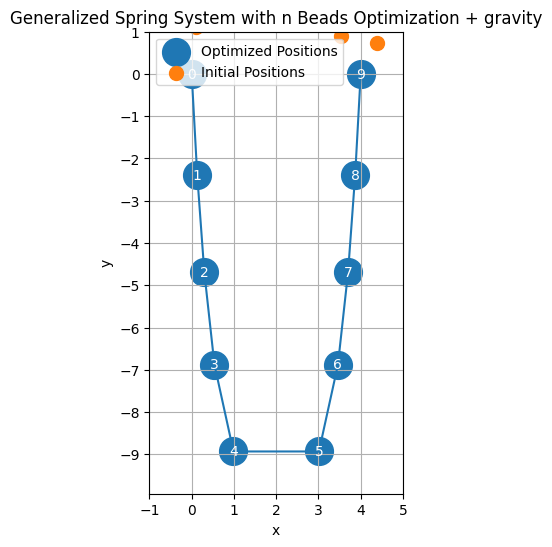

In [112]:
# learning
learning_rate = 0.1
steps = 10000
P0 = [0, 0]  # Fixed point 1
P2 = [4, 0]  # Fixed point 2
n = 10        # Total number of beads (including fixed ones)

model = GravSpringSys(P0, P2, n)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Optimize
for step in range(steps):
    optimizer.zero_grad()
    energy = model()
    energy.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Energy: {energy.item()}')

optimized_positions = model.P.data.numpy()
print("Optimized positions of beads:")
for i, pos in enumerate(optimized_positions):
    print(f'Bead {i + 1}: {pos}')

fig, ax = plt.subplots(figsize=(8, 6))
model.draw(ax, show_initial=True)  # Pass show_initial=True
plt.title('Generalized Spring System with n Beads Optimization + gravity')
plt.show()


## Exercise 45
### 11.1 LJG systems
In several previous exercises, you have worked with optimizing clusters of atoms interacting via the Lennard-Jones or Lennard-Jones-Gauss pair-potential. Whenever you did relaxations or simulated annealing for those clusters, it was based on forces for which you had derived the analytic expression yourself. In this exercise you will be leveraging autodifferentiation to get the forces numerically.

### 11.2 Setup classes
a) Start by introducing a calculator class:

In [120]:
class LennardJonesGauss:
    def __init__(self,eps=1, sigma_squared=0.02, r0=1.7):
        self.eps = eps
        self.sigma_squared = sigma_squared
        self.r0 = r0        

    def V(self,r):
        r = torch.maximum(r, torch.tensor(1e-6))
        # Lennard-Jones potential term
        lj_term = 4 * self.eps * ((self.r0 / r)**12 - (self.r0 / r)**6)
        # Gaussian modulation term
        gauss_term = -self.eps * torch.exp(-((r - self.r0)**2) / (2 * self.sigma_squared))
        return lj_term + gauss_term

and a torch.nn.Module class that will hold the atomic positions.

In [121]:
class LJGSystem(torch.nn.Module):
    def __init__(self, calc, Natoms):
        super().__init__()
        self.calc = calc
        self.positions = torch.nn.Parameter(torch.rand(Natoms, 2))
        
    def forward(self):
        # Compute pairwise distances
        distances = torch.cdist(self.positions, self.positions, p=2)
        # Mask to avoid self-interaction
        mask = torch.eye(len(self.positions), dtype=bool)
        distances = distances[~mask].view(len(self.positions), -1)
        # Sum of potential energy for all pairs
        energy = torch.sum(self.calc.V(distances)) / 2  # Avoid double-counting
        return energy
    
    def draw(self, ax):
        ax.scatter(self.positions.data[:, 0],
                   self.positions.data[:, 1], s=200)

b) To check your calculator, you can use these positions:

In [122]:
# Test on given positions
pos = torch.tensor([[4.065, 5.93],
                    [3.211, 5.465],
                    [5.711, 4.9],
                    [6.567, 5.374],
                    [4.113, 6.903],
                    [5.741, 5.879],
                    [5.662, 3.924],
                    [4.893, 5.411],
                    [4.844, 4.443],
                    [4.036, 4.953],
                    [6.539, 4.384],
                    [4.931, 6.382]], dtype=torch.float32)

# Create the calculator and system
calc = LennardJonesGauss(eps=1, sigma_squared=0.02, r0=1.7)
system = LJGSystem(calc, len(pos))

# Set the positions manually
system.positions = torch.nn.Parameter(pos)

# Forward pass to calculate energy
energy = system()

# Print the calculated energy
print(f"Calculated Energy: {energy.item()}")


Calculated Energy: 72119.0859375
